# Introduction

The term Support Vector Machines (SVM's) is sometimes used loosely to refer to three methods:
- Maximal margin classifier,
- Support vector classifier,
- Support vector machine. 

Each are an extension of the previous method, allowing them to be applied to a broader range of cases.

Support Vector Machines (SVM) are a common discriminative algorithm, well suited to *complex* small- to medium sized datasets<sup>Géron</sup>, which aim to find a hyperplane that provides the maximum margin of separation between classes of objects. 

They can be used for both __classification__ and regression.

**NOTES**
- Nearly all statys sections are from Intro to stats learning so make sure to reference them

**PLAN**
- Images from the Hands on machine learning (using the petal data)
- some explanation from the python ML
- structure of the Intro to stats learning & some algebra
- Some algebra from Machine learning: a probabilitistic perspective.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
from sklearn import datasets
from IPython.display import Image
from sklearn.svm import SVC, LinearSVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

matplotlib.rcParams['animation.embed_limit'] = 30000000.0
plt.rcParams['figure.dpi'] = 120

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#!pip install mlxtend

In [2]:
iris = datasets.load_iris(as_frame=True)
iris_df = iris['data']
target = iris['target']

To demonstrate SVM's I'll be using Fisher's (or Anderson's) Iris flowers dataset<sup>Fisher</sup>.

- _"We will use a single example dealing with three species of the iris flower. This data comes from a famous experiment on a series of measurements of three species of iris flowers. R A Fisher, a statistically minded thinker in the early twentieth centure used this dataset in his 1936 paper The Use of multiple measurements in taxonomic problems, published in the Annals of Eugenics. We will begin by using this data to investigate some basic questions one might have about the data. These questions will not be limited to this dataset however, and we must note that there is some kind of relationship to Eugenics in the taxonomic problem for Fisher."_ https://bookdown.org/koehlerj/qr_book/introducing-the-iris-dataset.html

- We'll come back to this dataset when discussing clustering later as well.

- _"How to classify three species of Iris flowers (Versicolor, Setosa, and Virginica) without using labels"_

- _"The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species._
    
    _The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), and 150 records under five attributes - sepal length, sepal width, petal length, petal width and species. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters."_ https://cloudxlab.com/assessment/displayslide/5165/keras-project-iris-flower-identification-introduction-to-iris-dataset

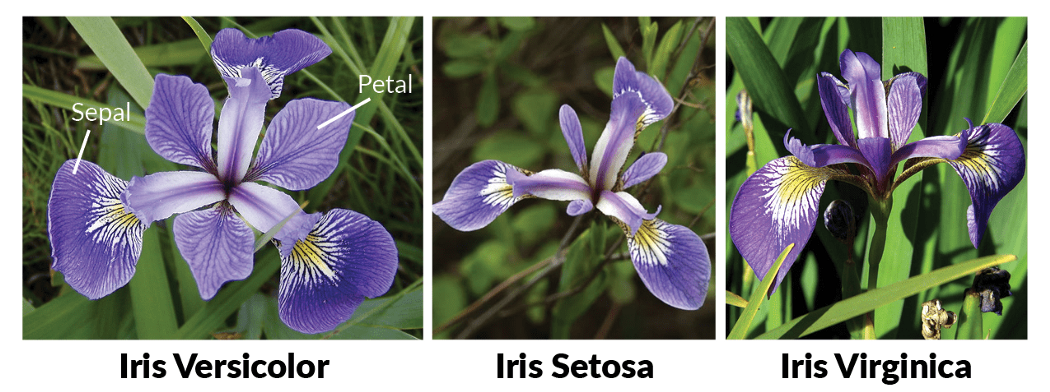

In [3]:
Image("1_2b9TA6i27eGjeDQE9qUaEg.png") # Image from: 

The data set consists of 50 samples from each of three species of Iris, with four features measured from each sample: the length and the width of the sepals and petals, in centimeters.

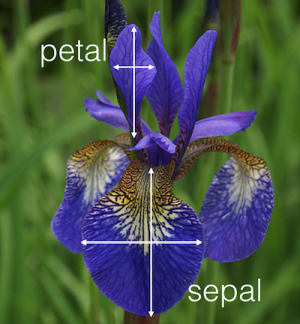

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
display(Image("03_iris.png")) # Image from: https://www.ritchieng.com/machine-learning-iris-dataset/
iris_df.head()

In [5]:
from sklearn.preprocessing import LabelEncoder

# get the labels of flowers capetalised for vidualisation
target_names = list(map(lambda s: s.capitalize(), iris['target_names']))

# create a dictionary with the original labels decoded (inverse of LabelEncoder)
decode_label = dict(zip(range(3), target_names))

# make a label encoder to use later if needed
le = LabelEncoder().fit(target_names)

decode_label

{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

In [6]:
# add the target labels to df for visualisation purposes
iris_vis = pd.concat([iris_df, target],axis=1)
# turn the ints to labels
iris_vis["target"] = iris_vis["target"].replace(decode_label)

iris_vis.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa

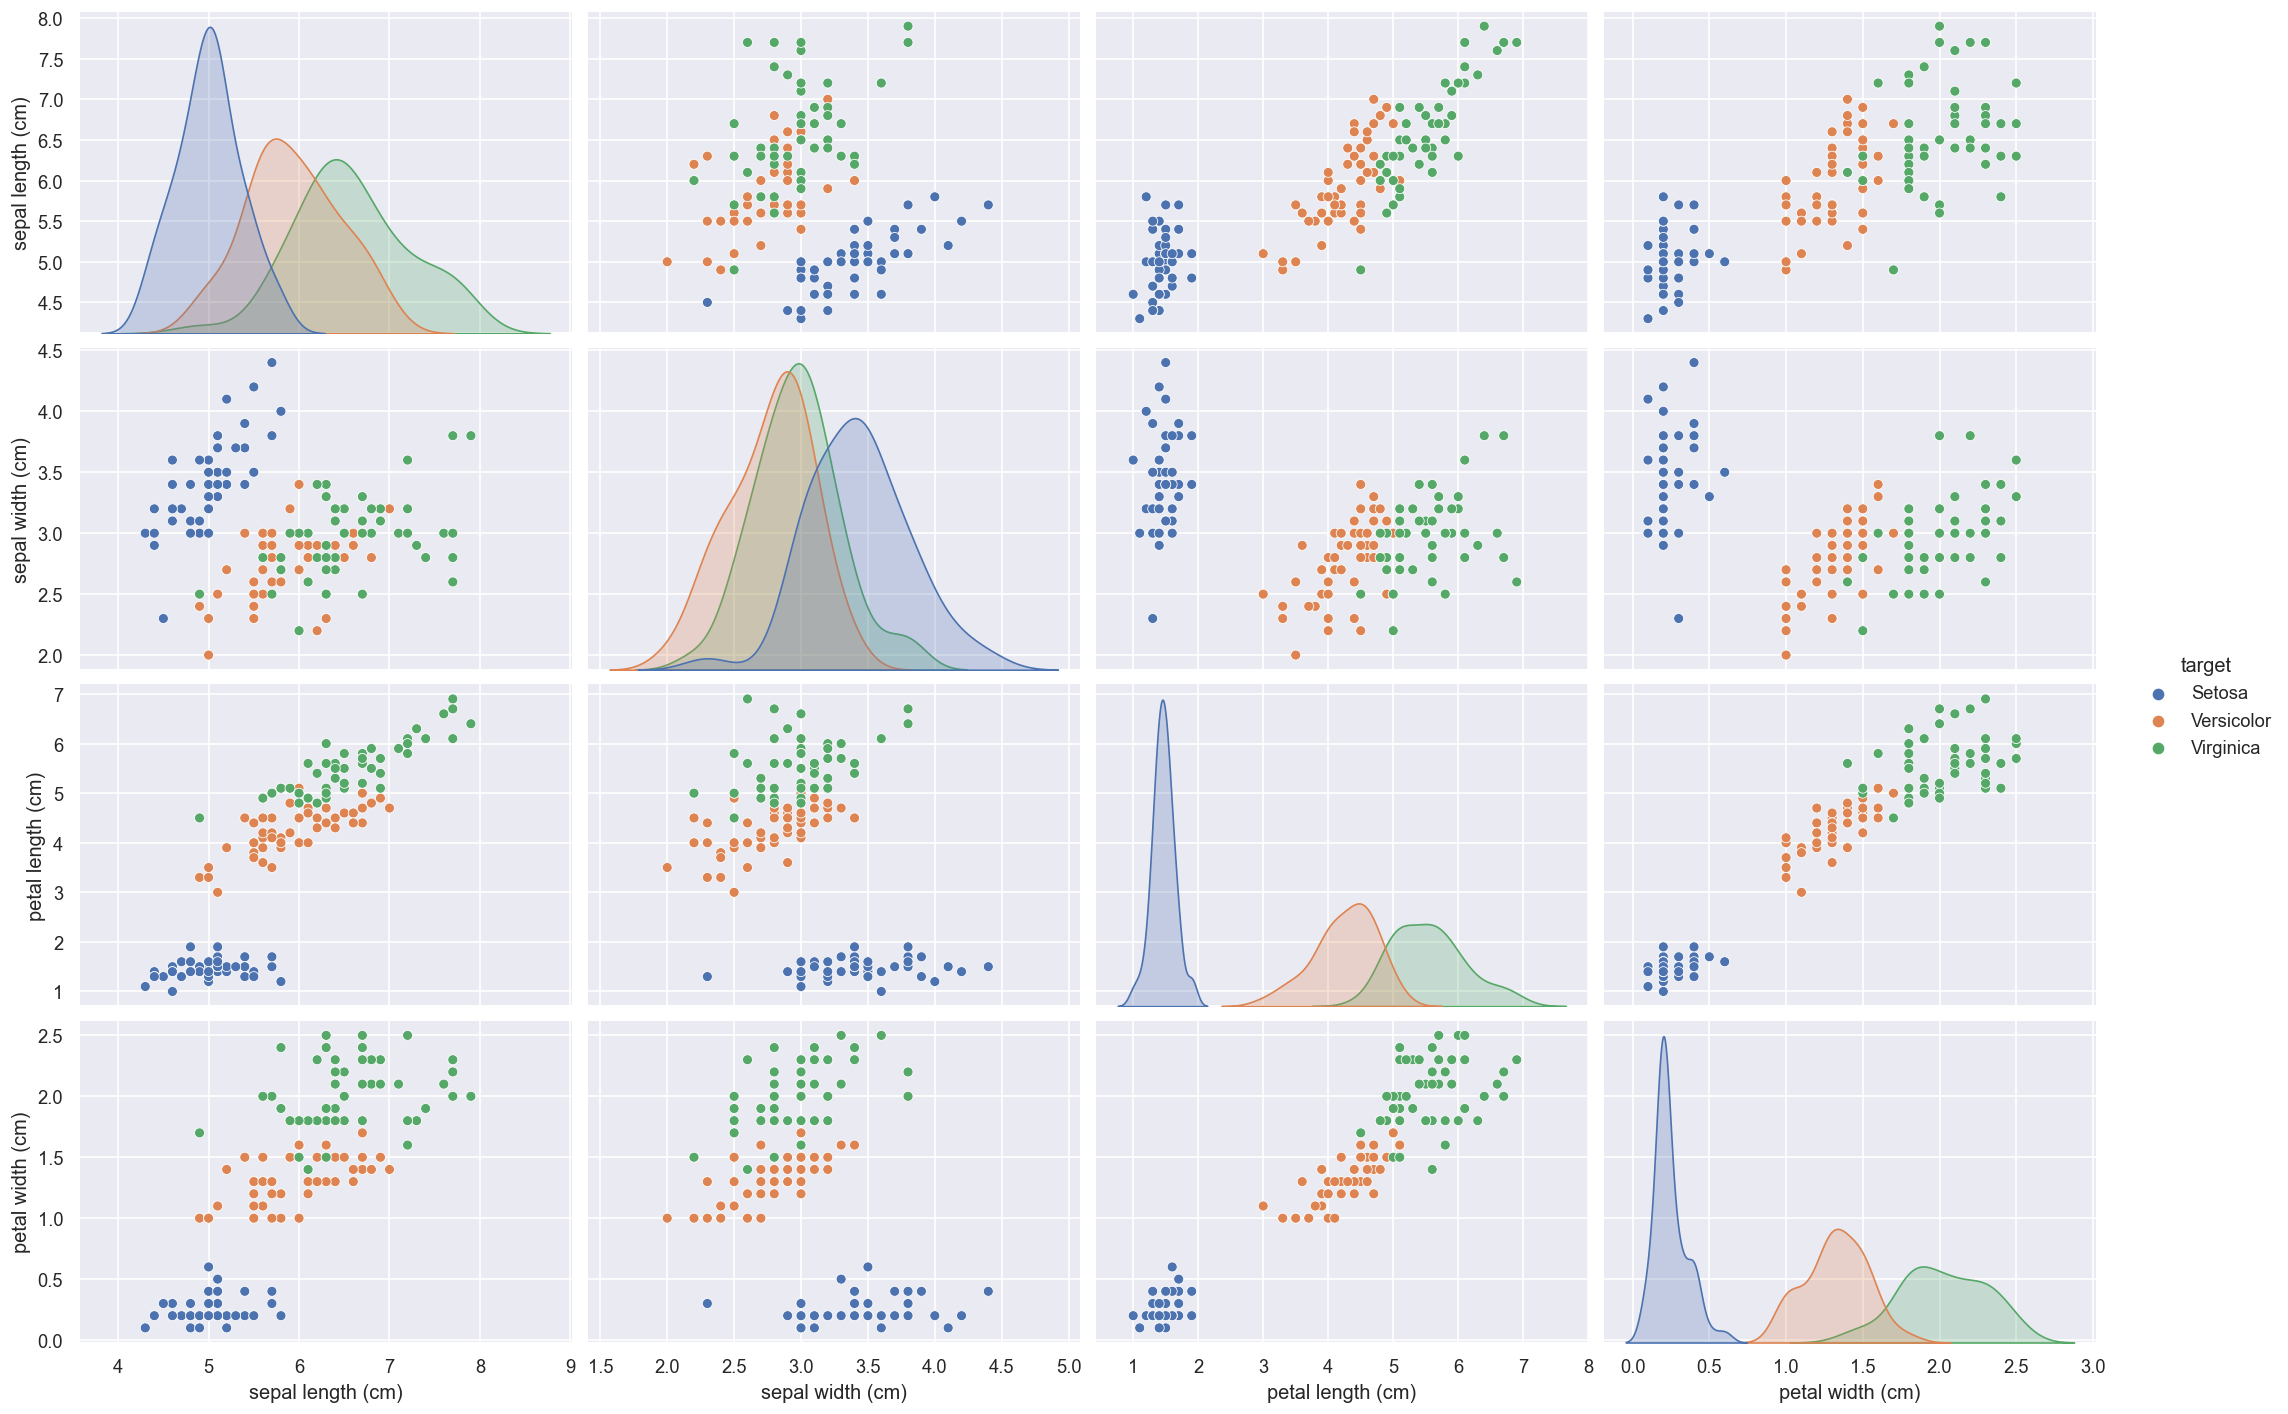

In [7]:
sns.pairplot(iris_vis, hue="target", height=3, aspect = 1.5)
plt.show()

In [8]:
set_versi = iris_vis[["petal length (cm)", "petal width (cm)", "target"]]
set_versi = set_versi[set_versi.target != "Virginica"]

def set_versi_plot():
    g = sns.scatterplot(data=set_versi, x = "petal length (cm)", 
                y = "petal width (cm)", hue="target", 
                style = "target")
    plt.axis([0, 5.5, 0, 2])
    plt.title("Petal lengths and widths of Setosa and Versicolor flowers")
    g.axes.get_legend().set_title(False)

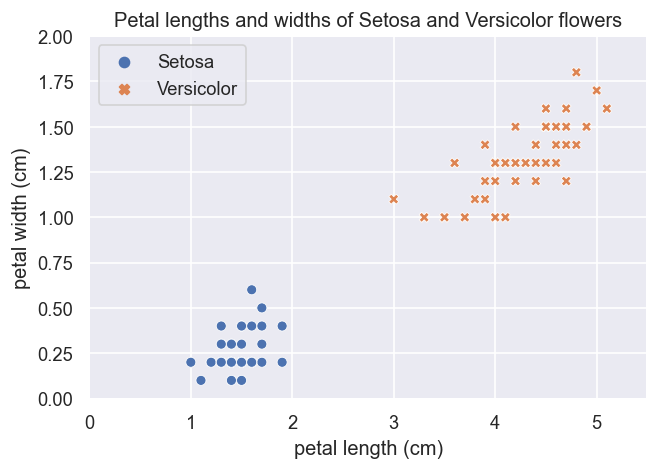

In [9]:
set_versi_plot()
plt.show()

In [10]:
# Altered https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
from sklearn.svm import SVC
x0 = np.linspace(0, 5.5, 200)
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

X = set_versi[["petal length (cm)", "petal width (cm)"]].values
y = le.transform(set_versi[["target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

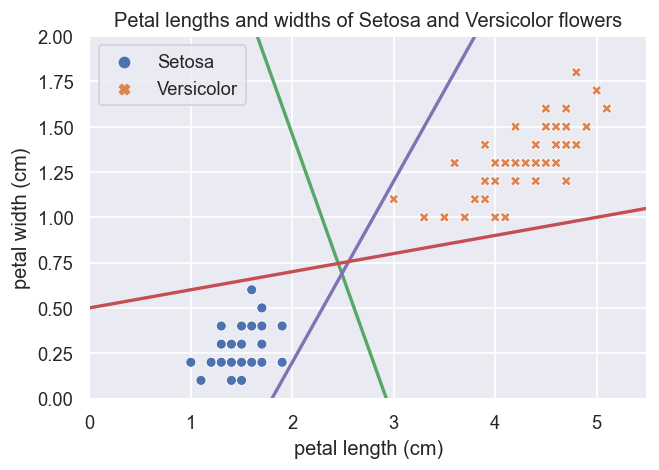

In [11]:
set_versi_plot()
plt.plot(x0, decision_boundary, "g-", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.show()

In [12]:
# Altered https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
# SVM Classifier model
svm_clf = SVC(kernel="linear", 
              C=float("inf") # Inf is for demo purposes (dont use in practice!)
             )
svm_clf.fit(X, y)
def plot_svc_decision_boundary(clf, xmin, xmax, highlight=True):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = clf.support_vectors_
    if highlight:
        g = sns.scatterplot(x = svs[:, 0], y = svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "g-", linewidth=2)
    plt.plot(x0, gutter_up, "r--", linewidth=2)
    plt.plot(x0, gutter_down, "r--", linewidth=2)

Here the middle thick line is a <span style="color:green">__hyperplane__</span> and the dashed outer lines are the edges of the <span style="color:red">__Margin__</span>.

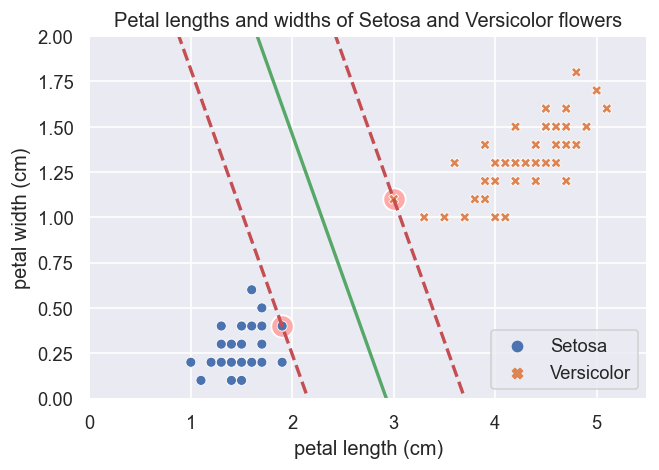

In [13]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
set_versi_plot()
plt.show()

## What is a Hyperplane?
In _p_-dimensional space, a hyperplane is a flat affine (does not need to pass through the origin) subspace of dimension p-1.

**Examples**
- *Two-dimensions*: A flat one-dimensional line (previous plots)
- *Three-dimensions*: A three-dimensional subspace (subsequent plot)
- *P-dimensions*: A P-dimensional subspace (...nope)

In [14]:
# Three Dimension
%matplotlib notebook

def three_dim():
    X = iris.data.values[:, :3]  # we only take the first three features.
    Y = iris.target

    # make it binary classification problem
    X = X[np.logical_or(Y==0,Y==1)]
    Y = Y[np.logical_or(Y==0,Y==1)]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    x = X[:, 0]
    y = X[:, 1]
    z = X[:, 2]

    ax.set_xlabel(iris_df.columns[0])
    ax.set_ylabel(iris_df.columns[1])
    ax.set_zlabel(iris_df.columns[2])

    ax.scatter(x, y, z)

    # SVM
    model = SVC(kernel='linear')
    clf = model.fit(X, Y)

    # The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
    # Solve for w3 (z)
    z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

    xm, xM = X[:,0].min(), X[:, 0].max()
    ym, yM = X[:,1].min(), X[:, 1].max()

    number_of_squares = 10
    x = np.linspace(xm, xM, number_of_squares)
    y = np.linspace(ym, yM, number_of_squares)
    x, y =np.meshgrid(x, y)
    ax.plot_surface(x, y, z(x,y), alpha=0.5)
    ax.view_init(elev=23., azim=168.)

    plt.show()

<IPython.core.display.Javascript object>


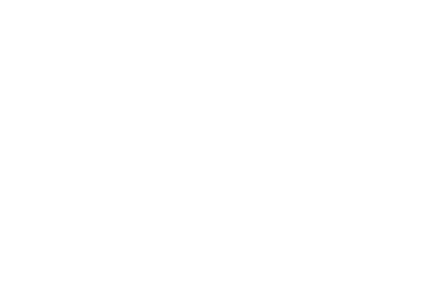

In [15]:
three_dim()

*Two-dimensions*: $\beta_0 + \beta_1X_1 + \beta_2X_2 = 0$

*Three-dimensions*: $\beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 = 0$

*P-dimensions*: $\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p = 0$

---

If $X = (X_1, ..., X_p)^T$ satisfies above, then it is a point on the hyperplane.

If $\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p > 0$ it lies on one side of the hyperplane and $\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p < 0$ on the other. In-other-words p-dimensional space is dividided into two halves.

### Classifying data using a separating hyperplane
We aim to classify an $n \times p$ matrix of $n$ observations in $p$ dimensional space with these observations falling into two classes $y_1,...,y_n \in \{-1,1\}$.

If we were to perfectly separate the classes the hyperplane would have the property that

$\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip} > 0$ if $y_i = 1$,

and

$\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip} < 0$ if $y_i = -1$.

---

For new test observations $x^*$, we would assign it to class 1 if $f(x^*)$ is positive and class -1 if negative. Furthermore the magnitude of $f(x^*)$ can be used to indicate how far the point lies from the hyperplane.

## Exercises

1.

2.

3.

# References
1. Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), 179-188.
2. James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.
3. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
4. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".
5. Raschka, 2016

web1.  https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
web2. https://scikit-learn.org/stable/datasets/toy_dataset.html

# NOTES
- https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py